# Module 4: Calculus & Differential Equations

---

# Day 2: Differential equations exercises

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy.linalg as lin
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

## 1. LIF model with time-varying input current

In our lecture example of the LIF model, we used a constant $I_{input}$ for simplicity and to allow for a tractable analytical solution. However, the problem becomes much more interesting when $I_{input}$ also varies with time, such that:

$$
C \frac{dV}{dt} = (E_\text{leak} - V) \frac{1}{R} + I(t)
$$

Assuming $RC = 20 ms$, $E_{leak} = -70 mV$, and $V_0 = -70 mV$, use Euler's method to model the above differential equation with the following input currents:

1. $I(t)$ is a step-function, where $I(t) = 1000C$ amps for $250$ ms $< t < 750$ ms and $I(t) = 0$ everywhere else.
2. $I(t) = I_0\sin(\omega t)$, where $I_0 = 1000C$ amps and angular frequency $\omega = 10$

**Note:** Don't think too hard about the $C$ in the input current functions -- this is just to "cancel out" the $C$ in the differential equation when it gets moved to the right side.

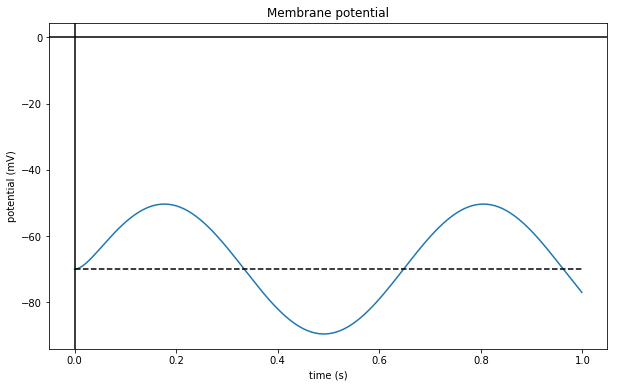

In [16]:
# initialize constants
RC = 0.02
E_leak = -70
V_init = -70

# input current
def I_in(t):
    return 1000*np.sin(10*t)
            

# membrane potential dynamics
def dV_dt(V,t):
    return (E_ion-V)/RC + I_in(t)

# Euler's method
h = 0.001
t = np.arange(0,1,h)
V_em = np.zeros_like(t)
N = np.size(t)
V_em[0] = V_init
for n in np.arange(1,N):
    V_em[n] = h*dV_dt(V_em[n-1],t[n-1]) + V_em[n-1]
    
    
# plotting
_, ax = plt.subplots(figsize=(10,6))
ax.plot(t,V_em)
ax.plot(t,E_ion*np.ones_like(t),'k--')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k');
ax.set_title("Membrane potential");
ax.set_xlabel("time (s)")
ax.set_ylabel("potential (mV)");
    

## 2. Drift-diffusion model


In [18]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="60%" controls>
      <source src="41586_2019_1261_MOESM2_ESM.mp4" type="video/mp4">
</video></div>""")